This leaves __% of districts who will need to spend more $ on IA to get there [num_students]

On average we expect $__/student/year of additional spending assuming they upgrade to 1Mbps in the next 3(?) years 
[can we build in an expected % drop in BW cost] -- assume a certain number upgrade in 1yr, 2yr, etc and apply appropriate percentages

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

(2013, 29.189999999999998)
(2014, 18.227800016874824)
(2015, 11.558912948005796)
(2016, 7.501875600959554)
(2017, 5.033764825450595)
(2018, 3.532282270793204)
(2019, 2.618850878526951)
(2020, 2.06316216553498)
(2021, 1.7251072789161221)
(2022, 1.519450579949591)


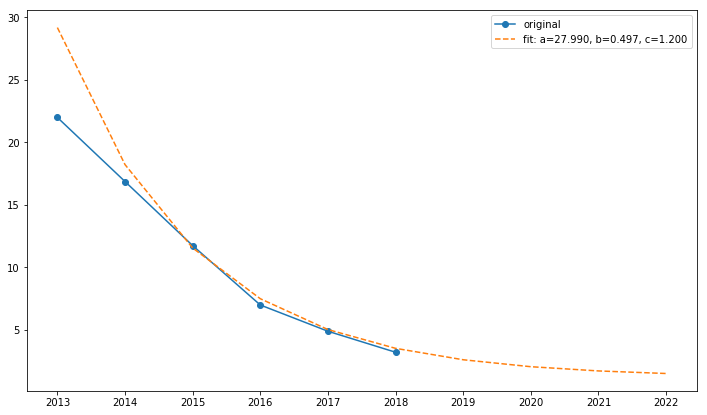

In [212]:
# def func(x, a, b, c):
#     return (x**2)*a * np.exp(b * x) + c

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

plt.figure(figsize=(12, 7))
xdata = np.arange(0, 6)
cost_per_mbps_w_2014 = [22.00, 22-((22-11.75)/2), 11.75, 7.00, 4.90, 3.22]
plt.plot(xdata, cost_per_mbps_w_2014, marker='o', label='original')


# # Initial guess
p0 = np.array([27.99, 0.497, 1.2], dtype=np.float64)
y4_initial = func(xdata, *p0)
popt, pcov = curve_fit(func, xdata, y4_initial) 

#fitting a curve
# y = cost_per_mbps_w_2014
# popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(0, 10)
plt.plot(x_new, func(x_new, *popt), 
         '--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend();
plt.xticks(np.arange(0, 10), np.arange(2013, 2024));
for el in list(zip(np.arange(2013, 2024), func(x_new, *popt))):
    print(el)

### With only 2015 and on

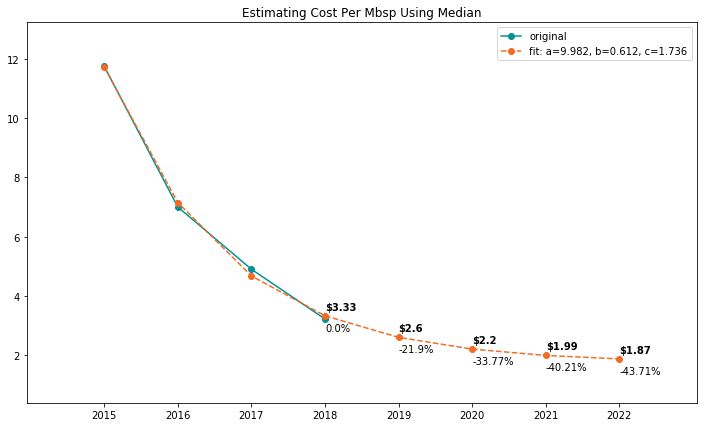

In [476]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

plt.figure(figsize=(12, 7))
xdata = np.arange(0, 4)
cost_per_mbps_w_2014 = [11.75, 7.00, 4.90, 3.22]
plt.plot(xdata, cost_per_mbps_w_2014, marker='o', label='original', color='#009296')


#fitting a curve
y = cost_per_mbps_w_2014
popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(0, 8)
plt.plot(x_new, func(x_new, *popt), '--', marker='o', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color="#f26c23")
for i, tup in enumerate(zip(x_new, func(x_new, *popt), pchange_year_to_year)):
    if i >= 3:
        plt.text(tup[0], tup[1]+.2, '$'+str(round(tup[1], 2)),
                 fontsize=10, color='black', fontweight='bold')
        plt.text(tup[0], tup[1]-.5, tup[2], 
                 fontsize=10, color='black')

plt.legend();
plt.title("Estimating Cost Per Mbsp Using Median");
plt.xticks(np.arange(0, 8), np.arange(2015, 2023));
plt.margins(0.15)

In [456]:
# pcent changes from 2018
def pchange_2018(v2018, vyear):
    return str(round(((vyear-v2018)/v2018)*100, 2))+'%'

projected_vals = func(x_new, *popt)
v2018 = func(x_new, *popt)[3]

pchange_year_to_year = [pchange_2018(v2018, v) for v in projected_vals]

In [457]:
pchange_year_to_year

['252.0%',
 '114.79%',
 '40.37%',
 '0.0%',
 '-21.9%',
 '-33.77%',
 '-40.21%',
 '-43.71%']

In [467]:
3.33-(3.33*.219)

2.60073

### Weighted Average Cost Per Mbps

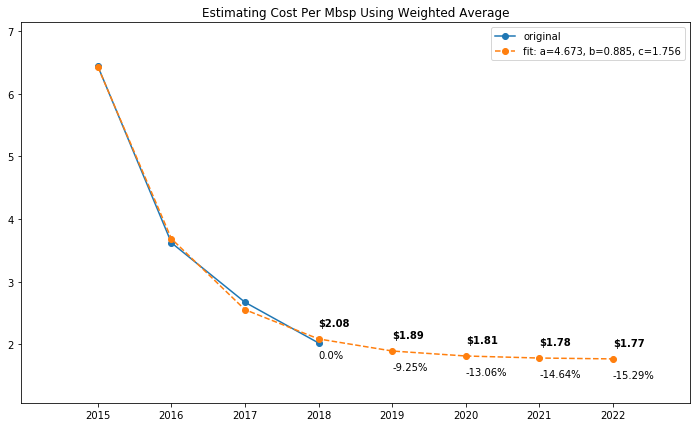

In [482]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

plt.figure(figsize=(12, 7))
xdata = np.arange(0, 4)
wavg_cost_per_mbps = [6.44, 3.62, 2.67, 2.02]
plt.plot(xdata, wavg_cost_per_mbps, marker='o', label='original')

# # Initial guess
# p0 = np.array([27.99, 0.497, 1.2], dtype=np.float64)
# y4_initial = func(xdata, *p0)
# popt, pcov = curve_fit(func, xdata, y4_initial) 

#fitting a curve
popt, pcov = curve_fit(func, xdata, wavg_cost_per_mbps) 

# projecting for new values
x_new = np.arange(0, 8)
plt.plot(x_new, func(x_new, *popt), '--', marker='o', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
for i, tup in enumerate(zip(x_new, func(x_new, *popt), pchange_year_to_year_avg)):
    if i >= 3:
        plt.text(tup[0], tup[1]+.2, '$'+str(round(tup[1], 2)),
                 fontsize=10, color='black', fontweight='bold')
        plt.text(tup[0], tup[1]-.3, tup[2], 
                 fontsize=10, color='black')
        
        
        
plt.legend();
plt.title("Estimating Cost Per Mbsp Using Weighted Average")
plt.xticks(np.arange(0, 8), np.arange(2015, 2023));
plt.margins(0.15)

In [479]:
# pcent changes from 2018
def pchange_2018(v2018, vyear):
    return str(round(((vyear-v2018)/v2018)*100, 2))+'%'

projected_vals_avg = func(x_new, *popt)
v2018 = func(x_new, *popt)[3]

pchange_year_to_year_avg = [pchange_2018(v2018, v) for v in projected_vals_avg]
pchange_year_to_year_avg

['208.39%',
 '76.74%',
 '22.41%',
 '0.0%',
 '-9.25%',
 '-13.06%',
 '-14.64%',
 '-15.29%']

### Upgrading curve

In [254]:
# Percent of districts upgrading over the years
# Using meeting 2014 
pcent_meeting_2014 = [30, ((77-30)*(3/4))+30,77, 88, 94, 97]

### Using 2013 to 2018 data

/Users/katherineaquino/anaconda3/envs/Tableau-Python-Server/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


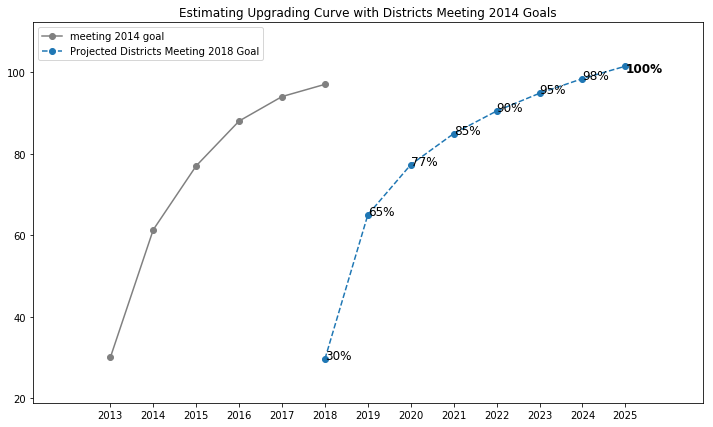

In [2]:
def func(x, a, b, c):
    return a*np.log(c+x)+b

plt.figure(figsize=(12, 7))
xdata = np.arange(0, 9)
pcent_meeting_2014 = [30, ((77-30)*(2/3))+30,77, 88, 94, 97, 99, 99.8, 100]  #added extra values in end
plt.plot(xdata[:6], pcent_meeting_2014[:6], marker='o', label='meeting 2014 goal', color='grey')
plt.xticks(np.arange(0, 8), np.arange(2013, 2021));

#fitting a curve
popt, pcov = curve_fit(func, xdata, pcent_meeting_2014) 

# projecting for new values
x_new = np.arange(0, 8)
x_plot = np.arange(5, 13)
f_vals = [popt[0]*np.log(popt[2]+x)+popt[1] for x in x_new]
plt.plot(x_plot, f_vals, '--', marker='o', label='Projected Districts Meeting 2018 Goal')
for i, tup in enumerate(zip(x_plot, f_vals)):
    if i < 7:
        plt.text(tup[0], tup[1], str(round(tup[1]))[:2]+'%', fontsize=12, color='black')
    else:
        plt.text(tup[0], 100, str(round(100))[:3]+'%', fontsize=12, fontweight='bold', color='black')
        
plt.legend(loc='upper left');
plt.title("Estimating Upgrading Curve with Districts Meeting 2014 Goals")
plt.xticks(np.arange(0, 13), np.arange(2013, 2026));
plt.margins(0.15)

In [5]:
f_vals = [popt[0]*np.log(popt[2]+x)+popt[1] for x in x_new]
f_vals

[29.657782790285022,
 65.02295786063166,
 77.30087974742446,
 84.9199526410667,
 90.45866066885971,
 94.81276150302597,
 98.40076376336086,
 101.45234359003916]

### Possible Upgrading Projections

#### Linear

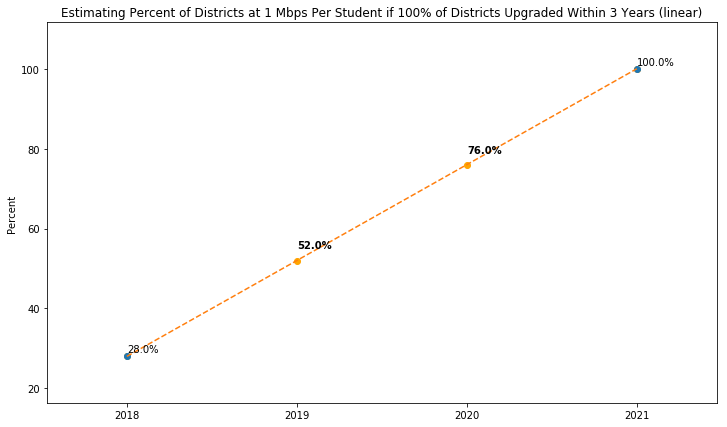

In [625]:
x = [2018, 2021]
y = [28, 100]
f = interp1d(x, y)

# plot projected 
plt.figure(figsize=(12, 7))
xnew = np.linspace(2018, 2021, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '--')

# projected values
x_proj = np.arange(2018, 2022)
y_proj = f(x_proj)

# add text of projected values
for i, (a, b) in enumerate(zip(x_vals, y_proj)):
    plt.scatter(a, b, marker='o', color='orange')
    if i in [1, 2]:
        plt.text(a, b+3, str(b)+'%', fontweight='bold')
    elif i in [0, 3]:
        plt.text(a, b+1, str(b)+'%')
    
# plot parameters
plt.xticks(np.arange(2018, 2022), (2018, 2019, 2020, 2021))
plt.title("Estimating Percent of Districts at 1 Mbps Per Student if 100% of Districts Upgraded Within 3 Years (linear)")
plt.ylabel("Percent")
plt.margins(0.15);

### -(1/x)

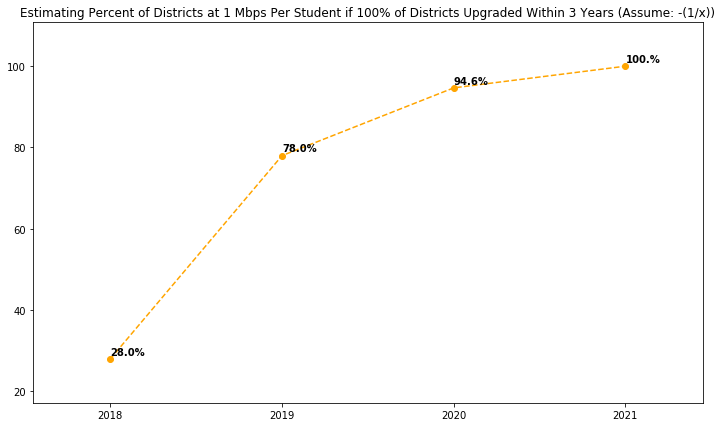

In [643]:
x_new = np.arange(1, 5)

# assumed model
def efunc(x):
    return -(1/x) + 1.28

# projected percent by year with assumed model
y_vals = [efunc(x) for x in x_new]

# max at 100%
y_vals = y_vals[:-1] + [1.0]
y_vals = np.array(y_vals)*100

# plotting
plt.figure(figsize=(12, 7))
plt.plot(x_new, y_vals, '--', marker='o', color='orange')
for tup in zip(x_new, y_vals, pchange_year_to_year):
    plt.text(tup[0], tup[1]+1, str(round(tup[1], 2))[:4]+"%", fontsize=10, color='black', fontweight='bold')

plt.xticks(x_new, (2018, 2019, 2020, 2021))
plt.title("Estimating Percent of Districts at 1 Mbps Per Student if 100% of Districts Upgraded Within 3 Years (Assume: -(1/x))")
plt.margins(0.15);

### Exponential

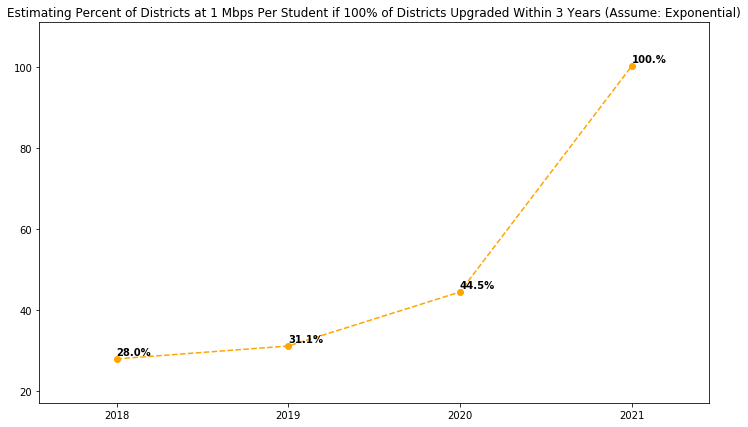

In [658]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

plt.figure(figsize=(12, 7))
xdata = [1, 2, 3, 4]
ydata = [np.exp(1.431*x)+27 for x in np.arange(0, 4)]
plt.plot(xdata, ydata, '--', marker='o', label='original', color='orange')
for tup in zip(xdata, ydata):
    plt.text(tup[0], tup[1]+1, str(round(tup[1], 2))[:4]+"%", fontsize=10, color='black', fontweight='bold')


# plt.legend();
plt.title("Estimating Percent of Districts at 1 Mbps Per Student if 100% of Districts Upgraded Within 3 Years (Assume: Exponential)")
plt.xticks(np.arange(1, 5), np.arange(2018, 2022));
plt.margins(0.15)